 #### **1. All the possible outcomes for an amount of dices.**

In this part I use a function that randomly simulates a roll of the n dices, if the outcomes does not exists it is added to the possible outcomes. 
The function stops when the length of the outcomes is equal to all the possible combinations that we can get from the roll of 5 dices.


In [3]:
import random

def all_outcomes(n):
  dice = [1,2,3,4,5,6]
  outcomes = []

  while (len(outcomes) < 6**n): 
    roll = [] 
    for i in range(n):
      number = random.choice(dice)
      roll.append(number)
    if roll not in outcomes:
      outcomes.append(roll)

  return outcomes

sample_space = all_outcomes(5)
print(sample_space)       


[[2, 5, 1, 2, 2], [6, 1, 2, 5, 4], [3, 3, 2, 4, 2], [3, 1, 1, 3, 4], [6, 5, 3, 6, 3], [6, 4, 5, 1, 4], [6, 1, 1, 4, 5], [4, 4, 3, 1, 3], [1, 5, 4, 2, 3], [5, 3, 3, 1, 2], [1, 1, 5, 3, 3], [3, 2, 1, 2, 6], [2, 4, 4, 6, 6], [4, 1, 6, 2, 3], [1, 3, 5, 3, 1], [2, 5, 2, 1, 5], [3, 1, 3, 5, 5], [4, 2, 5, 1, 6], [1, 3, 2, 1, 3], [2, 4, 3, 3, 3], [2, 6, 4, 6, 2], [2, 5, 6, 1, 6], [3, 4, 4, 3, 4], [5, 1, 5, 4, 2], [3, 5, 5, 3, 2], [4, 2, 6, 6, 2], [3, 3, 4, 1, 1], [6, 1, 2, 6, 5], [4, 3, 4, 3, 1], [6, 1, 3, 3, 4], [5, 1, 1, 4, 3], [1, 3, 4, 1, 2], [1, 5, 4, 2, 1], [5, 2, 4, 2, 4], [1, 1, 1, 2, 5], [2, 1, 4, 2, 2], [6, 5, 5, 1, 1], [4, 1, 1, 5, 4], [5, 6, 1, 6, 6], [5, 6, 6, 6, 2], [3, 1, 6, 6, 6], [5, 2, 4, 6, 3], [1, 4, 5, 2, 3], [3, 5, 1, 1, 6], [4, 3, 6, 5, 5], [1, 2, 1, 3, 2], [5, 3, 1, 5, 3], [4, 1, 3, 1, 1], [2, 3, 4, 1, 2], [5, 2, 2, 5, 2], [5, 2, 1, 6, 3], [6, 5, 1, 2, 5], [6, 4, 1, 3, 4], [2, 1, 2, 4, 5], [6, 2, 3, 4, 5], [6, 6, 1, 2, 4], [1, 5, 2, 1, 5], [6, 3, 4, 4, 2], [1, 5, 6, 3, 

#### **2. Function that returns if we have got a straight, full, poker or generala**

Here, the function *more_than_20* takes the hand that we want (Straight, Full, Poker or Generala) as an input, if we get it with the roll of n dices it returns True or False.

In [6]:
def more_than_20(n, hand):
  sample_space = []
  sample_space = all_outcomes(n) # Uses the function created before
  throw = random.choice(sample_space)
  
  if (hand == 'Straight'):
    print (throw)
    my_straight = [1,2,3,4,5]
    my_straight2 = [2,3,4,5,6]
    if (all(item in throw for item in my_straight) or all(item in throw for item in my_straight2)): 
      return True
    else:
       return False


  if (hand == 'Full'):
    result = False
    for elem in throw:
      if throw.count(elem) == 3:
        throw.remove(elem)
        if (throw[0] == throw[1]):
          result = True
    return result 
  
  if (hand == 'Poker'):
    result = False
    for elem in throw:
      if throw.count(elem) == 4:
        result = True
    return result
  
  if (hand == 'Generala'):
    result = False
    for elem in throw:
      if throw.count(elem) == 5:
        result = True
    return result

print(more_than_20(5,'Straight'))


[3, 4, 2, 4, 6]
False


#### **3. Probabilities**

**a) Probability of each kind of served hand**


a1) Probability of served Straight

There are only two possible straights, then we count all the outcomes that have the same numbers as the possible straights (no matter the order).

In [7]:

my_straight = [1,2,3,4,5]
my_straight2 = [2,3,4,5,6]
count_straight = 0
straights = []

for element in sample_space: 
  if (all(item in element for item in my_straight) or all(item in element for item in my_straight2)):
    straights.append(element)
    count_straight += 1

straight_prob = count_straight/len(sample_space)
print (straight_prob)

0.030864197530864196


a2) Probability of served poker

Here we count how many elements have 4 numbers of the same kind

In [8]:
pokers = []
count_poker = 0

for throw in sample_space:
  for element in throw:
    if (throw.count(element) == 4 and throw not in pokers):
      pokers.append(throw)
      count_poker += 1

pokers_prob = count_poker/len(sample_space)
print(pokers_prob)

0.019290123456790122


a3) Probability served generala

The same as for the pokers but for 5 numbers of the same kind

In [9]:
generalas = []
count_generala = 0

for throw in sample_space:
  for element in throw:
    if (throw.count(element) == 5 and throw not in generalas):
      generalas.append(throw)
      count_generala += 1
      
generalas_prob = count_generala/len(sample_space)
print(generalas_prob)

0.0007716049382716049


**b) Probability poker or generala having obtained two or three dices of a kind in the second roll**

Here I follow the same strategy on each part. I calculate the probability of obtaining the outcome I need for poker or generala using all the outcomes of 2 or 3 dices, deppending on the number of dices of the same kind collected before.

As which number of the same kind was obtained before does not matter. I will suppose that the collected number was a 1.

b.1) Collected 2. Chances of generala



In [10]:
collected_2_generala = 0
sample_space_3_generala = all_outcomes(3) # All the possible outcomes of three dices

for throw in sample_space_3_generala:
  if (throw.count(1) == 3):
    collected_2_generala += 1

prob_generala_coll_2 = collected_2_generala/len(sample_space_3_generala)
print(prob_generala_coll_2)


0.004629629629629629


b.2) Collected 2. Chances of poker



In [11]:
collected_2_poker = 0
sample_space_3_poker = all_outcomes(3) 

for throw in sample_space_3_poker:
  if (throw.count(1) >= 2):
    collected_2_poker += 1
prob_poker_coll_2 = collected_2_poker/len(sample_space_3_poker)

print(prob_poker_coll_2)

0.07407407407407407


b.3) Collected 3. Chances of generala


In [12]:
collected_3_generala = 0
sample_space_2_generala = all_outcomes(2)

for throw in sample_space_2_generala:
  if (throw.count(1) == 2):
    collected_3_generala += 1
prob_generala_coll_3 = collected_3_generala/len(sample_space_2_generala)

print(prob_generala_coll_3)


0.027777777777777776


b.4) Collected 3. Chances of poker

In [13]:
collected_3_poker = 0
sample_space_2_poker = all_outcomes(2)

for throw in sample_space_2_poker:
  if (throw.count(1) >= 1):
    collected_3_poker += 1
prob_poker_coll_3 = collected_3_poker/len(sample_space_2_poker)

print(prob_poker_coll_3)

0.3055555555555556


**c) Probability generala or Poker having obtained three dices of a kind on the first roll**

In this exercise we have to take into account that we have two rolls left. Then first I calculate the probability of obtaining the hand on the first roll (the same way I calculated it on the previous exercise). Then, we have to calculate the probability that, not having obtained the hand on the first roll, we obtain it on the second.

c1) Collected 3 first roll. Chances of poker

In [14]:
collected_3_first_poker = 0
not_collected_3_first_poker = 0 
sample_space_2_poker_first = all_outcomes(2)

for throw in sample_space_2_poker_first:
  if (throw.count(1) == 1):
    collected_3_first_poker += 1
  elif (throw.count(1) != 1):
    not_collected_3_first_poker += 1 # Count for the probability of not obtaining poker on the first roll

prob_poker_coll_3_first = (collected_3_first_poker/len(sample_space_2_poker_first))+(not_collected_3_first_poker*collected_3_first_poker)/len(sample_space_2_poker_first)**2
print(prob_poker_coll_3_first)

0.4783950617283951


c2) Collected 3 first roll. Chances of generala

For the generala I asume that the player is not following a greedy strategy, and even if he obtains a poker on the first roll he rolls again the two dices.

In [ ]:
collected_3_first_generala = 0
not_collected_3_first_generala = 0
sample_space_2_generala_first = all_outcomes(2)

for throw in sample_space_2_generala_first:
  if (throw.count(1) == 2):
    collected_3_first_generala += 1
  elif throw.count(1) != 2:
    not_collected_3_first_generala += 1


prob_generala_coll_3_first = collected_3_first_generala/len(sample_space_2_generala_first) + (not_collected_3_first_generala*collected_3_first_generala)/len(sample_space_2_generala_first)**2
print(prob_generala_coll_3_first)

0.054783950617283944


#### **4. A function that simulate a roll with n fair dices**

Here we take a random number from a dice n times.

In [18]:
def fair_dice(n):
  dice = [1,2,3,4,5,6]
  roll = []
  for i in range(n):
    number = random.choice(dice)
    roll.append(number)
  
  return roll
print(fair_dice(5))


[5, 1, 2, 2, 1]


#### **5. Function that tries to get a Generala with a max of 3 rolls**



In [21]:
def Generala_seeker_max3(n):
  throw = []
  generala = []
  poker = []
  three_kind = []
  pair = []
  result = False
  for i in range(3):
    throw += fair_dice(n)  # Use the fair_dice(n) created before

    # Check what hand we got

    for elem in throw:
      if throw.count(elem) == 5:
        generala = throw
        n = 0
        result = True
        break
      elif throw.count(elem) == 4:
        poker = [x for x in throw if x == elem]
        n = 1
      elif throw.count(elem) == 3:
        three_kind = [x for x in throw if x == elem]
        n = 2
      elif throw.count(elem) == 2 and n != 2:
        pair = [x for x in throw if x == elem]
        n = 3

    # Check which is the best hand obtained

    if generala:
      throw = generala
    elif poker:
      throw = poker
    elif three_kind:
      throw = three_kind
    elif pair:
      throw = pair
    else:
      throw = []
    
  return result
      

print(Generala_seeker_max3(5))


False


This function follows a Bernoulli distribution: a distribution that models one trial in an experiment that can result in either success or failure. 

Our experiment is the 3 rolls of the dices, and the result is success or failure depending if we get a generala or not.

We can run this function 1 milion times to see how difficult is to get a generala in 3 rolls. The probability is around 5 %.

1000000
0.046093


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


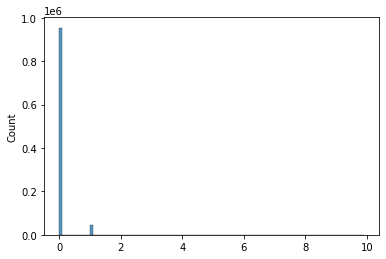

In [ ]:
import scipy
import seaborn
t = 0
result = []
while t < 1000000:
  result.append(Generala_seeker_max3(5))
  t += 1

probability_less_3 = result.count(True)/(len(result))

print(probability_less_3)
seaborn.histplot(result , bins=[n/10 for n in range(100)])

#### **5. Plays until get Generala**

In [32]:
def Generala_seeker(n):
  throw = []
  generala = []
  poker = []
  three_kind = []
  pair = [] 
  times = 0
  result = False
  while result == False:
    times += 1
    throw += fair_dice(n)
    for elem in throw:
      if throw.count(elem) == 5:
        generala = throw
        result = True
        break
      elif throw.count(elem) == 4:
        poker = [x for x in throw if x == elem]
        n = 1
      elif throw.count(elem) == 3:
        three_kind = [x for x in throw if x == elem]
        n = 2
      elif throw.count(elem) == 2 and n != 2:
        pair = [x for x in throw if x == elem]
        n = 3

    if generala:
      throw = generala
    elif poker:
      throw = poker
    elif three_kind:
      throw = three_kind
    elif pair:
      throw = pair
    else:
      throw = []
  
  return (times)
print(Generala_seeker(5))

    
  

13


In this case the function follows a geometric distribution: a function that models the number of tails before a head in a sequence of coin flips.

In this case our "tails" are the rolls before obtaining a generala.

If we plot the distribution we can see that the most repeated value is around 8. Moreover, we can compare this result with the one obtained in the previous exercise, taking the number of attempts lower than 4, and calculating its probability, we see that it is around 5 % as well.

In [ ]:
n = 0
Attempts = []

while n < 1000000:
  Attempts.append(Generala_seeker(5))
  n += 1


0.046438
1000000


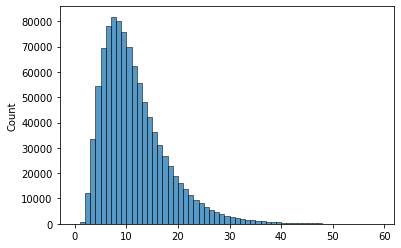

In [ ]:
seaborn.histplot(Attempts , bins=[n for n in range(60)])
counter = 0

for element in Attempts:
  if element < 4:
    counter +=1

probability = counter/len(Attempts)
print(probability)
